# Natural Language Processing

## Classify Messages as Spam or Ham

Let’s start an NLP use case using a dataset coming from UCI datasets   containing a collection of more than 5000 SMS phone messages. The objective of this use case is to train a machine learning model on labelled data (ham or spam) and use it to classify unlabeled messages as spam or ham. 

In [3]:
# Import libraries
import nltk 

# Download the necessary datasets
#nltk.download() 

In [7]:
# Let's list of all the lines of text messages using rstrip
messages = [line.rstrip() for line in open('')]
print(len(messages))

5574


In [8]:
# Print the first 5 messages
for message_no, message in enumerate(messages[:5]):
    print(message_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though




In [11]:
# For convenient reasons, we will use Pandas, Matplotlib and Seaborn to manipulate and visualize data. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Use read_csv 
messages = pd.read_csv('../data/datasets/SMSSpamCollection', sep='\t', names= ['label', 'message'])

messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# We can start some descriptive analysis of the data and visualize them through plots.  
messages.describe()
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [13]:
# We add a new feature called length telling us how long the text messages are
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

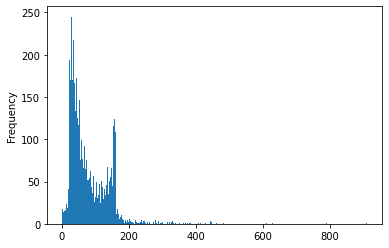

In [14]:
# Plot the frequency versus length of messages
messages['length'].plot(bins=400, kind='hist')
# Message length description
messages.length.describe()

In [16]:
# Look at the message with 910 characters
messages[messages['length'] == 910]['message'].iloc[0]


"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [17]:
# look at the message with 2 characters
messages[messages['length'] == 2]['message'].iloc[0]

'Ok'

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

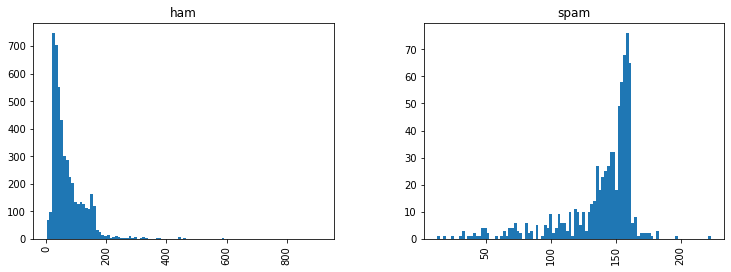

In [18]:
# We can have a look if length could be a good feature distinguishing ham and spam
messages.hist(column='length', by='label', bins=100,figsize=(12,4))

As described before, we need to preprocess the data such as converting the corpus to a vector format with for example the bag-of-words approach as well as split messages into individual words, remove punctuations by importing a list of English stopwords from NLTK and remove common words. 

In [19]:
import string
from nltk.corpus import stopwords

def text_process(mess):

    # Check if punctuation is present
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

# Look at the first five messages
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

To convert the corpus to a vector format we will use CountVectorizer from Scikit Learn. We will have a matrix of two dimensions with the first dimension being the entire vocabulary (1 row per word) and the second dimension the actual document (a column per text message). 

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

bag_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

# Number of vocab words
print(len(bag_transformer.vocabulary_))

# Transform bag-of-words
messages_bag = bag_transformer.transform(messages['message'])

# Matrix size and amount of non-zero occurences
print('Matrix Shape: ', messages_bag.shape)
print('Non-zero occurences: ', messages_bag.nnz)

# TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(messages_bag)
messages_tfidf = tfidf_transformer.transform(messages_bag)
print(messages_tfidf.shape)

11425
Matrix Shape:  (5572, 11425)
Non-zero occurences:  50548
(5572, 11425)


Model training, prediction of test data and evaluate the model

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(messages_tfidf, messages['label'], test_size=0.2)

# Model fit
spam_detect_model = MultinomialNB().fit(X_train, y_train)

# Predict testint data
predictions = spam_detect_model.predict(X_test)
print(predictions)

from sklearn.metrics import classification_report
print (classification_report(y_test, predictions))

['ham' 'ham' 'ham' ... 'spam' 'ham' 'ham']
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       977
        spam       1.00      0.78      0.87       138

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [24]:
from sklearn.model_selection import train_test_split
from sklearn import svm

# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(messages_tfidf, messages['label'], test_size=0.2)

# Model fit
spam_detect_model = svm.SVC(kernel='linear').fit(X_train, y_train)

# Predict testint data
predictions = spam_detect_model.predict(X_test)
print(predictions)

from sklearn.metrics import classification_report
print (classification_report(y_test, predictions))


['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       975
        spam       1.00      0.84      0.91       140

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



# Sentiment Analysis

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tweepy
from textblob import TextBlob
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import json
from collections import Counter

# Keys and Access Token for authentification
APIKey = "BCbdlvnwBEXzERcobCUwqXv3b"
APIKeySecret = "GLuhwmcT9vh6zXpaBuU6vD0DQVAMREPA9RFKHA5txr809Kq0UK"
accessToken = "1596910891211149312-cNX0Bvz6p5AZMc8bDp9mlAIZ197Xpw"
accessTokenSecret = "oI2wC8BrAc4KbnmPT6Fall3hSayJqIpUbvw84Hm5bZSb8"
bearer_token = "AAAAAAAAAAAAAAAAAAAAAJM3jwEAAAAAFMudohrcQeIldPDzsF2TRbjJVME%3DhIlhlgtI1ed6MixDqmB3LqdW0vvVQs9Q1hhKzcfyf79Vttietp"

client = tweepy.Client(bearer_token=bearer_token)

# Authentification
#auth = tweepy.OAuthHandler(APIKey, APIKeySecret)
#auth.set_access_token(accessToken, accessTokenSecret)
#api = tweepy.API(auth)

[nltk_data] Downloading package stopwords to /Users/xavi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
# Sentiment Analysis

# Define the words to query and maximum number of tweets
# The following code fetches the most recent 2500 mentions of '@fhollande'
query = '@fhollande'
max_tweets = 100
#tweets = [status for status in tweepy.Cursor(api.search_tweets, q=query, lang="en").items(max_tweets)]
#tweets = tweepy.Cursor(api.search_tweets, q=query).items(max_tweets)
tweets = client.search_recent_tweets(query=query, tweet_fields=['context_annotations', 'created_at'], max_results=max_tweets)


#Finding sentiment analysis (+ve, -ve and neutral)
pos = 0
neg = 0
neu = 0
for tweet in tweets:
    analysis = TextBlob(tweet.text)
    if analysis.sentiment[0]>0:
       pos = pos +1
    elif analysis.sentiment[0]<0:
       neg = neg + 1
    else:
       neu = neu + 1
print("Total Positive = ", pos)
print("Total Negative = ", neg)
print("Total Neutral = ", neu)

AttributeError: 'list' object has no attribute 'text'

In [28]:
# Sentiment Analysis

# Define the words to query and maximum number of tweets
# The following code fetches the most recent 2500 mentions of '@fhollande'
query = '@fhollande'
max_tweets = 100
#tweets = [status for status in tweepy.Cursor(api.search_tweets, q=query, lang="en").items(max_tweets)]
#tweets = tweepy.Cursor(api.search_tweets, q=query).items(max_tweets)
tweets = client.search_recent_tweets(query=query, tweet_fields=['context_annotations', 'created_at'], max_results=max_tweets)

print(tweets)
# Let's determine if comments are more positive, negative or neutral
positive = 0
negative = 0
neutral = 0
polarity = 0

tweet_list    = []
neutral_list  = []
negative_list = []
positive_list = []

for tweet in tweets:
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
 
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1
  
# Calculate the percentage
positive =  100 * (positive / max_tweets)
negative =  100 * (negative / max_tweets)
neutral  =  100 * (neutral  / max_tweets)
polarity =  100 * (polarity / max_tweets)

positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral  = format(neutral, '.1f')

tweet_list    = pd.DataFrame(tweet_list)
neutral_list  = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)

print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

Response(data=[<Tweet id=1596968033167499265 text='RT @savartcha: @Hebert7Jeanmarc @fhollande cette  députée n.est pas capable de parler par elle-même ; elle a besoin d’une interprète ! Comm…'>, <Tweet id=1596965998443499520 text="@N_de_Oliveira @LiliBrinderbe @RaphalLefebvre3 @VDuchaussoy @fhollande Au moins une chose qui nous rapproche concernant DG et moi qui te pensait plus éclairée politiquement  mais chacun ses choix. La mienne se fera toujours loin du populisme dont laquelle la gauche s'est engouffrée malheureusement avec LFI😉. Bisous😘">, <Tweet id=1596965397638496258 text='@fhollande @salondesmaires @LaFrancesengage @app_elles @ComptoirCampagn @EnergiePartagee @LaClocheAsso @InSite_France https://t.co/UtDCNVlV1n'>, <Tweet id=1596965332328980481 text='@fhollande https://t.co/UtDCNVlV1n'>, <Tweet id=1596963409266085888 text='@saidasaadi7 @LiliBrinderbe @RaphalLefebvre3 @VDuchaussoy @fhollande C’est la seule chose juste que tu as pu écrire ce soir. Prends soin de toi.'>, <Tweet id

AttributeError: 'list' object has no attribute 'full_text'

In [ ]:
# Repartition visualization

labels = [‘Positive [‘+str(positive)+’%]’ , ‘Neutral [‘+str(neutral)+’%]’,’Negative [‘+str(negative)+’%]’]
sizes = [positive, neutral, negative]
colors = [‘yellowgreen’, ‘blue’,’red’]
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use(‘default’)
plt.legend(labels)
plt.title(“Sentiment Analysis Result for keyword= “+keyword+”” )
plt.axis(‘equal’)
plt.show()